# HW 7: Implementing a Convolutional Neural Network

In this homework assignment, you will implement a convolutional neural network from scratch using numpy.

There are three parts to this assignment:
- In part 1, you will implement the building blocks for a CNN.
- In part 2, you will put the building blocks together to form a CNN model.
- In part 3, you will use your CNN implementation to recognize digits on MNIST.

A few important notes:
* You will need to set up and activate your virtual environment.  I have posted a .yaml file on Sakai, and you can look up instructions online on how to create a virtual environment from a .yaml file.  Make sure your jupyter notebook is running in your virtual environment by following [these instructions](https://anbasile.github.io/programming/2017/06/25/jupyter-venv/).

* For autograding purposes, many cells are set in *read-only* mode.  This means you cannot edit, delete, or move these cells. 

* For parts 1 and 2, you should not modify any code except where you see `# YOUR CODE HERE`.  Please remove `raise NotImplementedError()` and write your code in its place.

* We provide code cells that check your code as you progress through the assignment. These tests will help catch obvious errors, but passing these tests is not a guarantee that your implementation is correct. Your notebook will be graded on a more complete set of tests which are not visible to you.

* You may add new cells anywhere in the notebook while working, but make sure to delete them before submitting your assignment.  Please do not change the sequence of the cells.  This is to ensure that autograding works properly.

* If you run cells out of order, it may change variable values which may cause tests to fail.  The easiest way to avoid this problem is to use the ***Restart & Run all*** option available in the **Kernel** tab.  Before submitting, you should do this to ensure that your notebook can be run from beginning to end without errors.  This is how your notebook will be graded.


## Part 1

In this part you will implement forward propagation and backward propagation for the building blocks in a CNN.  There are six building blocks:

* rectified linear unit
* linear layer
* softmax
* flatten
* max pooling
* convolutional layer

You will implement everything from scratch in numpy, so we only need to import one package!

In [1]:
import numpy as np

#### Rectified Linear Unit

Implement the forward and backward propagation functions for the ReLU activation function.  Even though you've implemented this before, try doing this without looking at your notes so you can truly implement the CNN from scratch!

In [2]:
def ReLU(Z):
    '''
    Applies the rectified linear unit activation function to each element in z.
    
    Inputs
        Z : input to the activation function, size (batch, m)
        
    Outputs
        A : output of the activation function, size (batch, m)
    '''
    #Return zero if less than 0
    A = np.maximum(0,Z)
    
    return A

In [3]:
assert ReLU(0) == 0, "Incorrect value for t=0"
assert ReLU(1.234) == 1.234, "Incorrect result for a positive input."
assert ReLU(-2.35) == 0, "Incorrect result for a negative input."
assert np.array_equal(ReLU(np.array([1.15, -2, 3])), np.array([1.15, 0, 3])), "Incorrect result for 1D numpy array."
assert np.array_equal(ReLU(np.array([[-1, 6], [-3, 0.1], [4, 7]])), np.array([[0, 6], [0, 0.1], [4, 7]])), "Incorrect result for 2D numpy array."

In [4]:
def ReLU_backprop(dA, Z):
    '''
    Performs backprop on the ReLU activation function.
    
    Inputs
        dA: the gradient of the loss with respect to the output of the ReLU function
        Z: the input to the ReLU function during the forward propagation stage
        
    Outputs
        dZ: the gradient of the loss with respect to the input of the ReLU function
    '''
    #Zero where Z is zero, otherwise pass grad
    dZ =  np.multiply(dA, np.where(Z>0, 1, 0))
    
    return dZ

In [5]:
assert np.array_equal(ReLU_backprop(np.array([1.15, -2, 3]), np.array([-4, 2, .1])), np.array([0, -2, 3])), "Incorrect result for 1D numpy array."
assert np.array_equal(ReLU_backprop(np.array([[-1, 6], [-3, 0.3], [4, 7]]), np.array([[2, -1], [-.1, .1], [3, 5]])), np.array([[-1, 0], [0, .3], [4, 7]])), "Incorrect result for 2D numpy array."

#### Linear Layer

Implement the forward and backward propagation functions for a linear layer (without an activation function).  Again, try doing this without looking at your notes!  

In [6]:
def linear_layer(X, W, b):
    '''
    Performs a forward propagation through a linear layer.
    
    Inputs
        X : input vector of size (batch, n)
        W : multiplicative weight matrix, size (n, m)
        b : bias coefficients, size (1, m)
        
    Outputs
        Z : output vector of size (batch, m)
    '''
    assert X.ndim == 2, "Input should be a matrix"
    #Linear layer
    Z = X@W + b
    
    return Z

In [7]:
X = np.arange(6).reshape((2,3))
W = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[-1, -2]])
Z_ref = np.array([[12, 14],[39, 50]])
Z = linear_layer(X, W, b)
assert Z.shape == (2, 2), "Result is incorrect shape"
assert np.array_equal(Z, Z_ref), "Result has incorrect values"

In [8]:
def linear_layer_backprop(dZ, X, W, b):
    '''
    Performs a backward propagation through a linear layer.
    
    Inputs
        dZ : gradient of loss with respect to the output of the linear layer, size (batch, m)
        X : input to the linear layer during forward propagation, size (batch, n)
        W : multiplicative weight matrix, size (n, m)
        b : bias coefficients, size (1, m)
        
    Outputs
        dX : gradient of loss with respect to the input of the linear layer, size (batch, n)
        dW : gradient of loss with respect to multiplicative weights, size (n, m)
        db : gradient of loss with respect to bias coefficients, size (1, m)
    '''
    m = X.shape[0]
    
    #Save shape for b
    dbShape = b.shape
    
    #Calculate grads
    db =  np.reshape(np.sum(dZ, axis=0)/m, dbShape)
    dW = (np.matmul(X.T, dZ))/m
    dX = np.matmul(dZ, W.T)
    
    return dX, dW, db

In [9]:
dZ = np.array([[5, -1], [-2, 1]])
X = np.array([[1,2,3],[4,5,6]])
W = np.array([[1, 2], [3, 4], [5, 6]])
b = np.array([[-1, -2]])
dX_ref = np.array([[ 3, 11, 19], [0, -2, -4]])
dW_ref = np.array([[-1.5, 1.5], [0, 1.5], [1.5, 1.5]])
db_ref = np.array([[1.5, 0]])
dX, dW, db = linear_layer_backprop(dZ, X, W, b)
assert np.array_equal(dX, dX_ref), "Incorrect result for dX"
assert np.array_equal(dW, dW_ref), "Incorrect result for dW"
assert np.array_equal(db, db_ref), "Incorrect result for db"

#### Softmax

Implement the forward and backpropagation functions for softmax.  Try doing this without looking at your previous homeworks!  Remember to subtract the max in order to prevent overflow.

$$ softmax([z_1, \dots, z_k]) = \left[\frac{e^{z_1}}{e^{z_1}+ \dots + e^{z_k}}, \dots, \frac{e^{z_k}}{e^{z_1}+ \dots + e^{z_k}}\right]$$


In [10]:
def softmax(Z):
    '''
    Applies the softmax function to each row of a matrix Z.
    This implementation should be vectorized, so it should not contain any for loops.
    
    Inputs
        Z : input tensor of shape (batch, m)
        
    Outputs
        A : output tensor of shape (batch, m)
    '''
    assert isinstance(Z, np.ndarray) and Z.ndim == 2, "Input should be a 2D numpy array."
    
    maxVals = np.max(Z, axis=1, keepdims=True)

    #Calculate softmax
    Z = Z - maxVals
    numerator = np.exp(Z)
    denominator = np.sum(numerator, axis=1, keepdims=True)
    A = numerator/denominator
    
    return A

In [11]:
assert np.allclose(np.round(softmax(np.array([[0, 0, 0, 0]])), decimals=8), np.array([[0.25, 0.25, 0.25, 0.25]])), "Returns incorrect result for all zero matrix."
assert np.allclose(np.round(softmax(np.array([[1e6, 1e6, 1e6, 1e6]])), decimals=8), np.array([[0.25, 0.25, 0.25, 0.25]])), "Your implementation does not handle numerical overflow."

In [12]:
assert np.allclose(np.round(softmax(np.array([[1, 2, 3]])), decimals=8), np.array([[0.09003057, 0.24472847, 0.66524096]])), "Returns incorrect result for non-zero single row matrix."
assert np.allclose(np.round(softmax(np.array([[-2, 0, 10]])), decimals=8), np.array([[6.1400000e-06, 4.5400000e-05, 9.9994846e-01]])), "Returns incorrect result for single row matrix with ."
assert np.allclose(np.round(softmax(np.array([[0, 0], [-3.2, 1.1], [4, 3.4]])), decimals=8),  np.array([[0.5, 0.5],[0.01338692, 0.98661308],[0.64565631, 0.35434369]])), "Returns incorrect result for non-zero multiple row matrix."

Instead of implementing backprop for softmax, we will just directly compute the gradient of cross entropy loss with respect to the softmax inputs.

In [13]:
def softmax_grad(preds, targets):
    '''
    Directly computes the gradient of cross entropy loss with respect to the softmax inputs.
    
    Inputs
        preds : the matrix of softmax outputs, size (batch, numClasses)
        targets : one-hot encoded target labels, size (batch, numClasses)
        
    Outputs
        dZ : gradient of loss with respect to the softmax inputs, size (batch, numClasses)
        
    '''
    assert isinstance(preds, np.ndarray) and preds.ndim == 2, "preds should be a 2D numpy array."
    assert isinstance(targets, np.ndarray) and targets.ndim == 2, "targets should be a 2D numpy array."
    
    #Using equation from class
    dZ = -targets + preds

    return dZ

In [14]:
preds = np.array([[.1, .3, .6],[.2, .5, .3]])
targets = np.array([[0, 0, 1],[0, 1, 0]])
dZ_ref = np.array([[.1, .3, -.4],[.2, -.5, .3]])
assert np.allclose(softmax_grad(preds, targets), dZ_ref)

#### Flatten

Implement the forward and backward propagation functions for the flattening operation.

In [15]:
def flatten(X):
    '''
    Flattens the tensor of activations from a convolutional layer.
    
    Inputs
        X : tensor of shape (B, C, H, W), where B is the batch dimension and C is the channel
        
    Outputs
        Y : flattened tensor of shape (B, C x H x W)
    '''
    assert isinstance(Z, np.ndarray) and Z.ndim == 2, "Input should be a 2D numpy array."
    #Reshape the input
    b,c,h,w = X.shape
    Y = X.reshape(b, (c*h*w))
    
    return Y

In [16]:
X = np.arange(16).reshape((2,2,2,2))
Y_ref = np.array([[ 0,  1,  2,  3,  4,  5,  6,  7], [ 8,  9, 10, 11, 12, 13, 14, 15]])
Y = flatten(X)
assert np.array_equal(Y, Y_ref)

In [17]:
def flatten_backprop(dY, C, H, W):
    '''
    Performs backward propagation through a flattening layer.
    
    Inputs
        dY : gradient of the loss with respect to the output of the flattening layer, size (batch, m)
        C : number of channels in the input to the flattening layer
        H : height of the tensor input to the flattening layer
        W : width of the tensor input to the flattening layer
        
    Outputs
        dX : gradient of the loss with respect to the input of the flattening layer, size (batch, C, H, W)
    '''
    assert isinstance(dY, np.ndarray) and dY.ndim == 2, "Input should be a 2D numpy array."
    assert dY.shape[1] == C*H*W, "Dimensions of dY must be (batch, CxHxW)"
    
    #Reshape the grads
    b = dY.shape[0]
    dX = dY.reshape((b,C,H,W))
    return dX

In [18]:
dY = np.arange(16).reshape((2,8))
C, H, W = 2, 2, 2
dX_ref = np.arange(16).reshape((2,2,2,2))
dX = flatten_backprop(dY, C, H, W)
assert np.array_equal(dX, dX_ref)

#### im2col helper function

Your implementations for max pooling and the convolutional layer will depend on a utility function called `im2col`.  We provide an implementation below, taken from Stanford's [CS231n](http://cs231n.stanford.edu/) class.  These functions are very dense (and also implemented in cython), and you don't need to understand the details of the implementation.  You should, however, understand what the utility functions are doing at a high level.  Read [this](https://cs231n.github.io/convolutional-networks/) explanation of `im2col` in the section entitled "Implementation as Matrix Multiplication."

This section of the homework uses materials from the CS231n class and Agustinus Kristiadi's blog.  Therefore, please do not consult these websites or any affiliated websites (e.g. students posting their solutions to CS231n assignments) when completing this assignment.

In [19]:
%load_ext Cython

In [20]:
%%cython

# These functions are taken from https://github.com/yunjey/cs231n/blob/master/assignment2/cs231n/im2col_cython.pyx

import numpy as np
cimport numpy as np
cimport cython

DTYPE = np.float64
ctypedef np.float64_t DTYPE_t

# ctypedef fused DTYPE_t:
#     np.float32_t
#     np.float64_t

def im2col_cython(np.ndarray[DTYPE_t, ndim=4] x, int field_height,
                  int field_width, int padding, int stride):
    cdef int N = x.shape[0]
    cdef int C = x.shape[1]
    cdef int H = x.shape[2]
    cdef int W = x.shape[3]
    
    cdef int HH = (H + 2 * padding - field_height) // stride + 1
    cdef int WW = (W + 2 * padding - field_width) // stride + 1

    cdef int p = padding
    cdef np.ndarray[DTYPE_t, ndim=4] x_padded = np.pad(x,
            ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    cdef np.ndarray[DTYPE_t, ndim=2] cols = np.zeros(
            (C * field_height * field_width, N * HH * WW),
            dtype=x.dtype)

    # Moving the inner loop to a C function with no bounds checking works, but does
    # not seem to help performance in any measurable way.

    im2col_cython_inner(cols, x_padded, N, C, H, W, HH, WW,
                        field_height, field_width, padding, stride)
    return cols


@cython.boundscheck(False)
cdef int im2col_cython_inner(np.ndarray[DTYPE_t, ndim=2] cols,
                             np.ndarray[DTYPE_t, ndim=4] x_padded,
                             int N, int C, int H, int W, int HH, int WW,
                             int field_height, int field_width, int padding, int stride) except? -1:
    cdef int c, ii, jj, row, yy, xx, i, col

    for c in range(C):
        for yy in range(HH):
            for xx in range(WW):
                for ii in range(field_height):
                    for jj in range(field_width):
                        row = c * field_width * field_height + ii * field_height + jj
                        for i in range(N):
                            col = yy * WW * N + xx * N + i
                            cols[row, col] = x_padded[i, c, stride * yy + ii, stride * xx + jj]



def col2im_cython(np.ndarray[DTYPE_t, ndim=2] cols, int N, int C, int H, int W,
                  int field_height, int field_width, int padding, int stride):
    cdef np.ndarray x = np.empty((N, C, H, W), dtype=cols.dtype)
    cdef int HH = (H + 2 * padding - field_height) // stride + 1
    cdef int WW = (W + 2 * padding - field_width) // stride + 1
    cdef np.ndarray[DTYPE_t, ndim=4] x_padded = np.zeros((N, C, H + 2 * padding, W + 2 * padding),
                                        dtype=cols.dtype)

    # Moving the inner loop to a C-function with no bounds checking improves
    # performance quite a bit for col2im.
    col2im_cython_inner(cols, x_padded, N, C, H, W, HH, WW, 
                        field_height, field_width, padding, stride)
    if padding > 0:
        return x_padded[:, :, padding:-padding, padding:-padding]
    return x_padded


@cython.boundscheck(False)
cdef int col2im_cython_inner(np.ndarray[DTYPE_t, ndim=2] cols,
                             np.ndarray[DTYPE_t, ndim=4] x_padded,
                             int N, int C, int H, int W, int HH, int WW,
                             int field_height, int field_width, int padding, int stride) except? -1:
    cdef int c, ii, jj, row, yy, xx, i, col

    for c in range(C):
        for ii in range(field_height):
            for jj in range(field_width):
                row = c * field_width * field_height + ii * field_height + jj
                for yy in range(HH):
                    for xx in range(WW):
                        for i in range(N):
                            col = yy * WW * N + xx * N + i
                            x_padded[i, c, stride * yy + ii, stride * xx + jj] += cols[row, col]

You should use the cython implementation of `im2col` and `col2im` in your work.  If for some reason you are unable to get the above functions to compile, I have also included equivalent python implementations that have the same behavior (but are much, much slower).

In [21]:
# These functions are taken from https://github.com/yunjey/cs231n/blob/master/assignment2/cs231n/im2col.py

def get_im2col_indices(x_shape, field_height, field_width, padding=1, stride=1):
    # First figure out what the size of the output should be
    N, C, H, W = x_shape
    assert (H + 2 * padding - field_height) % stride == 0
    assert (W + 2 * padding - field_height) % stride == 0
    out_height = (H + 2 * padding - field_height) // stride + 1
    out_width = (W + 2 * padding - field_width) // stride + 1

    i0 = np.repeat(np.arange(field_height), field_width)
    i0 = np.tile(i0, C)
    i1 = stride * np.repeat(np.arange(out_height), out_width)
    j0 = np.tile(np.arange(field_width), field_height * C)
    j1 = stride * np.tile(np.arange(out_width), out_height)
    i = i0.reshape(-1, 1) + i1.reshape(1, -1)
    j = j0.reshape(-1, 1) + j1.reshape(1, -1)

    k = np.repeat(np.arange(C), field_height * field_width).reshape(-1, 1)

    return (k, i, j)


def im2col_indices(x, field_height, field_width, padding=1, stride=1):
    """ An implementation of im2col based on some fancy indexing """
    # Zero-pad the input
    p = padding
    x_padded = np.pad(x, ((0, 0), (0, 0), (p, p), (p, p)), mode='constant')

    k, i, j = get_im2col_indices(x.shape, field_height, field_width, padding,
                               stride)

    cols = x_padded[:, k, i, j]
    C = x.shape[1]
    cols = cols.transpose(1, 2, 0).reshape(field_height * field_width * C, -1)
    return cols


def col2im_indices(cols, x_shape, field_height=3, field_width=3, padding=1,
                   stride=1):
    """ An implementation of col2im based on fancy indexing and np.add.at """
    N, C, H, W = x_shape
    H_padded, W_padded = H + 2 * padding, W + 2 * padding
    x_padded = np.zeros((N, C, H_padded, W_padded), dtype=cols.dtype)
    k, i, j = get_im2col_indices(x_shape, field_height, field_width, padding,
                               stride)
    cols_reshaped = cols.reshape(C * field_height * field_width, -1, N)
    cols_reshaped = cols_reshaped.transpose(2, 0, 1)
    np.add.at(x_padded, (slice(None), k, i, j), cols_reshaped)
    if padding == 0:
        return x_padded
    return x_padded[:, :, padding:-padding, padding:-padding]


#### Max Pooling

Implement the forward and backward propagation functions for max pooling.  You should use the helper functions provided above!

In [22]:
def max_pool(X, sz, stride):
    '''
    Applies max pooling to the input tensor X.
    
    Inputs
        X: input tensor of shape B x C x H x W, where B is the batch dimension and C is the number of channels
        sz : the size of the pooling region, assumed to be a sz x sz square region
        stride : specifies the stride of the pooling, assumed to be the same in both dimensions
    
    Outputs
        Y: output tensor, result after performing max pooling
        max_idxs: array of integers specifying the max locations, used for performing back propagation
    '''
    assert X.ndim == 4, "Input should be a 4-dimensional tensor of shape B x C x H x W"
    
    # assume X is 10x3x14x14 (10 3-channel images) and we are performing 2x2 max pooling with stride 2
    B, C, H, W = X.shape
    
    # reshaped to 30x1x14x14 to prepare for im2col
    X_reshaped = X.reshape(B*C, 1, H, W)
    #Assume no padding
    pad = 0
    # TO DO:
    #  - use im2col function to calculate X_col, of shape 4 x 1470
    #  - calculate max_idxs, which specifies the index of the max element in each column of X_col
    #  - calculate maxvals, which specifies the max element in each column of X_col
    #  - calculate H_out, the height of the tensor after max pooling (must be integer)
    #  - calculate W_out, the width of the tensor after max pooling (must be integer)
    #Calc X_col
    X_col = im2col_cython(X_reshaped, sz, sz, pad, stride)
    #Calc max_idxs and maxvals
    max_idxs = np.argmax(X_col, axis = 0)
    maxvals = np.max(X_col, axis = 0)
    
    #Calc height and width
    H_out = (H-sz + 2*pad)/stride +1
    W_out = (W-sz + 2*pad)/stride +1

    # reshaped to 7x7x10x3
    Y = maxvals.reshape(int(H_out), int(W_out), B, C)
    
    # re-arrange tensor dimensions to get 10x3x7x7
    Y = Y.transpose(2, 3, 0, 1)

    return Y, max_idxs

In [23]:
np.random.seed(0)
X = np.random.randint(0,20,(2,2,4,4)).astype(np.float64)
Y, max_idxs = max_pool(X, 2, 2)
Y_ref = np.array([15, 19, 18, 14, 19, 19, 18, 19, 19, 14, 10, 18, 15, 17,  6, 14]).reshape((2,2,2,2))
max_idxs_ref = np.array([1, 3, 0, 2, 3, 3, 0, 1, 0, 2, 0, 3, 3, 3, 1, 3])
assert np.array_equal(Y, Y_ref), "Max pooled results are not correct"
assert np.array_equal(max_idxs, max_idxs_ref), "Max index locations are not correct"

In [24]:
def max_pool_backprop(dY, sz, stride, max_idxs):
    '''
    Performs back propagation on a max pooling layer.
    
    Inputs
        dY: gradient of the loss with respect to the max pooling outputs, shape BxCxHxW
        sz : the size of the pooling region, assumed to be a sz x sz square region
        stride : specifies the stride of the pooling, assumed to be the same in both dimensions
        max_idxs : array of integers specifying the max locations, computed during forward propagation
    
    Outputs
        dX: gradient of the loss with respect to the max pooling inputs, shape BxCxHxW
    '''
    assert dY.ndim == 4, "Ygrad should be a 4-dimensional tensor of shape B x C x H x W"
    
    # get dimensions of max pooling output & input
    B, C, H_out, W_out = dY.shape
    H_in = (H_out - 1)*stride + sz
    W_in = (W_out - 1)*stride + sz

    # re-arrange tensor dimensions to match im2col
    dY_flat = dY.transpose(2, 3, 0, 1).ravel()
    
    # TO DO:
    #  - initialize dX_col to a matrix of zeros, should be same size as X_col in forward propagation
    #  - put the values of dY_flat into the maximum index of each column in dX_col
    #  - calculate dX, of size (B*C, 1, H, W)
    #  - reshape dX to get original size (B, C, H, W)
    #Caclulate height and width to inizialize as zeros
    imcolW = B*C*np.power(int((H_in-sz)/stride + 1), 2)
    imcolH = sz*sz
    X_col = np.zeros((imcolH, imcolW))
    
    #Fill in X_col and use col2im
    cols = np.arange(max_idxs.shape[0])
    X_col[max_idxs, cols] = dY_flat
    dX = col2im_cython(X_col, B*C, 1, H_in, W_in, sz, sz, 0, stride).reshape(B,C,H_in,W_in)

    return dX

In [25]:
dY = np.arange(1,17).reshape((2,2,2,2))
max_idxs = np.array([1, 3, 0, 2, 3, 3, 0, 1, 0, 2, 0, 3, 3, 3, 1, 3])
dX = max_pool_backprop(dY, 2, 2, max_idxs)
dX_ref = np.array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,  0.,  0.,
        0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  5.,  0.,  6.,  0.,  0.,
        0.,  0.,  7.,  0.,  0.,  8.,  9.,  0., 10.,  0.,  0.,  0.,  0.,
        0., 11.,  0.,  0., 12.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 14.,
       13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0., 16.]).reshape((2,2,4,4))
assert np.array_equal(dX, dX_ref), "dX is not correct"

#### Convolutional Layer

Implement the forward and backward propagation functions for a convolutional layer. Again, you should use the helper functions provided above!

In [26]:
def conv_layer(X, W, b, padding, stride):
    '''
    Performs forward propagation through a convolutional layer.
    
    Inputs
        X: input tensor of shape B x C x H x W, where B is the batch dimension and C is the number of channels
        W : weights for convolutional filters, of shape (F, C, H, W) where F is the filter index
        b : bias coefficients for convolutional filters, array of size F
        padding : padding to add to each edge of the image
        stride : specifies the stride of the convolution, assumed to be the same in both dimensions
    
    Outputs
        Y: output tensor, result after applying convolutional filters
    '''
    assert X.ndim == 4, "Input should be a 4-dimensional tensor of shape B x C x H x W"
    assert W.ndim == 4, "Weights should be a 4-dimensional tensor of shape B x C x H x W"
    assert b.ndim == 2 and b.shape[1] == 1, "Offset should be a matrix of size F x 1"
    
    # assume X is 10x4x14x14 (10 4-channel images) and W is 9x4x3x3 with stride = 1 and padding = 1
    B, C, H_in, W_in = X.shape
    num_filters, c_filter, h_filter, w_filter = W.shape
    assert C == c_filter, "Number of channels in X does not match number of channels in W"
    assert b.size == num_filters, "Size of b does not match number of filters"

    # TO DO:
    #  - use im2col function to calculate X_col, of shape 36 x 1960
    #  - reshape weights into a matrix of size (9, 36)
    #  - compute convolutions as matrix product plus offset, result is 9 x 1960    
    #  - calculate H_out, the height of the output tensor
    #  - calculate W_out, the width of the output tensor
    
    #Find X_col and reshape W
    X_col = im2col_cython(X, h_filter, w_filter, padding, stride)
    W_reshaped = W.reshape(num_filters, h_filter*w_filter*c_filter)
 
    #Calculate Y with multiply
    Y = W_reshaped@X_col + b
    
    #Find the H and W
    H_out = int((H_in-h_filter + 2*padding)/stride +1)
    W_out = int((W_in-w_filter + 2*padding)/stride +1)
    
    
    # reshape to 10 x num_filters x 14 x 14
    Y = Y.reshape(num_filters, H_out, W_out, B)
    Y = Y.transpose(3, 0, 1, 2)
    
    return Y, X_col

In [27]:
np.random.seed(0)
X = np.random.randn(4,2,3,3)
W = np.random.randn(3,2,3,3)
b = np.random.randn(3).reshape((-1,1))
Y, X_col = conv_layer(X, W, b, padding=1, stride=1)
Y0_ref = np.array([-3.99137837,  0.78647053,  0.27615542, -2.48079681, -3.09172439,
        0.20607078, -0.62932756,  2.10743663,  5.24395253,  6.82293952,
        6.64998453,  2.14284251,  7.80405463,  1.01175079, 10.23511379,
        5.0491166 ,  5.02819876, -1.49527759,  2.52938873,  5.05618984,
       -2.78430683,  5.4168463 ,  5.65276193,  7.93504419,  7.02869897,
        5.50315519,  3.81005155])
X_col_ref = np.array([0.        , 0.        , 0.        , 0.        , 1.76405235,
       0.40015721, 0.        , 2.2408932 , 1.86755799, 0.        ,
       0.        , 0.        , 0.        , 0.4105985 , 0.14404357,
       0.        , 0.76103773, 0.12167502])
assert np.allclose(X_col_ref, X_col[:,0]), "X_col is incorrect"
assert np.allclose(Y0_ref.reshape((3,3,3)), Y[0]), "Output is incorrect"

In [28]:
def conv_layer_backprop(dY, W, b, padding, stride, X, X_col):
    '''
    Performs back propagation through a convolutional layer.
    
    Inputs
        dY: gradient of loss with respect to the convolutional layer output, shape BxCxHxW
        W : weights for convolutional filters, of shape (F, C, H, W) where F is the filter index
        b : bias coefficients for convolutional filters, array of size F
        padding : padding to add to each edge of the image
        stride : specifies the stride of the convolution, assumed to be the same in both dimensions
        X : input tensor of shape B x C x H x W, where B is the batch dimension and C is the number of channels
        X_col : reshaped input after im2col, computed during forward propagation
    
    Outputs
        dX : gradient of loss with respect to the convolutional layer input
        dW : gradient of loss with respect to the convolutiona layer filter weights
        db : gradient of loss with respect to the convolutiona layer bias coefficients
        
    '''
    assert dY.ndim == 4, "Gradients should be a 4-dimensional tensor of shape B x C x H x W"
    assert W.ndim == 4, "Weights should be a 4-dimensional tensor of shape F x C x H x W"
    assert b.ndim == 2 and b.shape[1] == 1, "Offset should be a matrix of size F x 1"
    assert X.ndim == 4, "Input should be a 4-dimensional tensor of shape B x C x H x W"
    
    # e.g. assume X is 10x4x14x14, Y is 10x9x14x14, W is 9x4x3x3 with stride = 1 and padding = 1
    n_filter, d_filter, h_filter, w_filter = W.shape
    batch_sz = dY.shape[0]
    
    # TO DO: calculate gradient of bias coefficients by
    #   - summing gradients over all pixel positions
    #   - averaging over all images in batch
    #   - reshaping to appropriate size, 9x1 in example
    db = dY.reshape(dY.shape[0], dY.shape[1], dY.shape[2]*dY.shape[3])
    db = np.sum(db, axis = 2)
    db = np.average(db, axis = 0)
    db = db.reshape(-1, 1)


    # TO DO: calculate gradient of conv layer filter weights by
    #   - rearranging and reshaping output gradients, size 9 x 1960 in example [provided]
    #   - calculate appropriate matrix product, result is size 9x36 in example
    #   - reshape to final desired size, 9x4x3x3 in example
    
    dY_reshaped = dY.transpose(1, 2, 3, 0).reshape(n_filter, -1) 
    dW = np.matmul(dY_reshaped, X_col.T)
    dW = dW.reshape(n_filter, d_filter, h_filter, w_filter)/dY.shape[0]

    # TO DO: calculate gradient of convolutional layer inputs by
    #   - reshaping conv layer filter weights (each row -> 1 filter), result is size 9x36 in example 
    #   - calculate dX_col as an appropriate matrix product, size 36x1960
    #   - use col2im function to calculate dX, size 10x4x14x14
    
    W_reshaped = W.reshape(-1,w_filter*h_filter*d_filter)
    #dY_reshaped = dY.transpose(0,2,3,1).reshape(-1, dY.shape[1]).T

    dX_col = np.matmul(W_reshaped.T, dY_reshaped)
    B,C,H_in, W_in = X.shape
    dX = col2im_cython(dX_col, X.shape[0], X.shape[1], X.shape[2], X.shape[3],
                       h_filter, w_filter, padding, stride)
    
        
    return dX, dW, db

In [29]:
np.random.seed(0)
X = np.zeros((4,2,3,3))
X_col = np.random.randn(18, 36)
W = np.random.randn(3,2,3,3)
b = np.random.randn(3).reshape((-1,1))
dY = np.random.randn(4,3,3,3)
dX, dW, db = conv_layer_backprop(dY, W, b, 1, 1, X, X_col)
dX3_ref = np.array([ 0.15393451,  9.80339438,  0.81894896,  6.17476504, -0.31962813,
       -6.17407366, -3.57093524, -6.60591174,  3.21924057,  1.90177136,
        2.05313522, -2.09301809, -4.71792436, -0.02449646, -1.54804584,
       -2.7598266 ,  0.02735023,  3.94832202])
dW0_ref = np.array([ 2.56976449,  0.26943072,  0.67234007, -1.43669202,  2.53140543,
        2.9665219 ,  0.45886205, -0.62803276,  0.74089213, -2.05960387,
        0.37660744,  0.35757989,  0.07539734, -2.61404337, -1.7515867 ,
       -1.44254232,  0.97522927, -0.80112989])
db_ref = np.array([-0.99280792, -0.99867817,  0.15267287])
assert np.allclose(dX[3].reshape(-1), dX3_ref), "Xgrad is not correct"
assert np.allclose(dW[0].reshape(-1), dW0_ref), "weightsgrad is not correct"
assert np.allclose(db.reshape(-1), db_ref), "bgrad is not correct"

## Part 2

In this part you will combine the building blocks together to construct a CNN model.  You will implement the following:
- model initialization
- forward propagation through model
- back propagation through model
- cross-entropy loss function
- gradient checking
- training loop
- predicting on images

We will use a slightly modified LeNet-5 architecture, which is summarized below.  The dimensions in parentheses show the output shape after each building block, using the convention channel x height x width (batch dimension not shown for brevity).
- Conv layer 1 (input shape 1x28x28)
    * convolutional layer (6 filters, 5x5, padding 2, stride 1) (6x28x28)
    * ReLU activation (6x28x28)
    * max pooling (2x2, no padding, stride 2) (6x14x14)
- Conv layer 2 (input shape 6x14x14)
    * convolutional layer (16 filters, 5x5, no padding, stride 1) (16x10x10)
    * ReLU activation (16x10x10)
    * max pooling (2x2, no padding, stride 2) (16x5x5)
- Flattening (input shape 16x5x5)
- Dense layer 1 (input shape 400)
    * linear layer, 120 units (120)
    * ReLU activation (120)
- Dense layer 2 (input shape 120)
    * linear layer, 84 units (84)
    * ReLU activation (84)
- Output layer (input shape 84)
    * linear layer, 10 units (10)
    * Softmax (10)



#### Model Initialization

Implement the function below to initialize the CNN model parameters using He initialization.

In [30]:
def initialize_model_parameters(seed = 0):
    '''
    Initializes the parameters in the CNN model.
    
        W1, b1 -> conv layer 1
        W2, b2 -> conv layer 2
        W3, b3 -> dense layer 1
        W4, b4 -> dense layer 2
        W5, b5 -> output layer    
      
    The conv layer weights are size (F, C, H, W), where F is the filter index and C is channel.
    The dense layer weights are size (n_in, n_out), where n_in is the number of input units.
    
    Parameters are returned in a tuple.
    '''
    #Declare the sizes from above
    w1Size  = (6,1,5,5)
    w2Size = (16,6,5,5)
    w3Size = (400,120)
    w4Size = (120,84)
    w5Size = (84,10)
    
    np.random.seed(seed)
        
    b1 = np.zeros((6, 1))
    b2 = np.zeros((16, 1))
    b3 = np.zeros((1, 120))
    b4 = np.zeros((1, 84))
    b5 = np.zeros((1, 10))
    
    # TO DO:
    #  - initialize W1, W2, W3, W4, W5 using He initialization (must be defined in that order)
    
    mu = 0
    #Initialize with He initialization. Use the given sizes and find standard deviations
    
    w1Sigma = np.sqrt(2/(w1Size[1]*w1Size[2]*w1Size[3]))
    w2Sigma = np.sqrt(2/(w2Size[1]* w2Size[2]*w2Size[3]))
    w3Sigma = np.sqrt(2/w3Size[0])
    w4Sigma = np.sqrt(2/w4Size[0])
    w5Sigma = np.sqrt(2/w5Size[0])
    
    #Initialize with the standard deviations
    W1 = np.random.normal(mu, w1Sigma, w1Size)
    W2 = np.random.normal(mu, w2Sigma, w2Size)
    W3 = np.random.normal(mu, w3Sigma, w3Size)
    W4 = np.random.normal(mu, w4Sigma, w4Size)
    W5 = np.random.normal(mu, w5Sigma, w5Size)

    params = (W1, b1, W2, b2, W3, b3, W4, b4, W5, b5)
    
    return params

In [31]:
(W1, b1, W2, b2, W3, b3, W4, b4, W5, b5) = initialize_model_parameters()
assert np.allclose(W1[0,0,0,:], np.array([0.49894935, 0.11318155, 0.27682891, 0.63382031, 0.52822517])), "W1 incorrect"
assert np.allclose(W2[0,0,0,:], np.array([-0.00787986,  0.19783978, -0.08599688, -0.0954289 , -0.01136832])), "W2 incorrect"
assert np.allclose(W3[0,0:5], np.array([-0.10336051, -0.10951643,  0.00894977,  0.05607407,  0.04511511])), "W3 incorrect"
assert np.allclose(W4[0,0:5], np.array([-1.73308838e-01, -2.27854099e-01, -1.04538200e-01, -1.65899206e-04, 1.87606738e-01])), "W4 incorrect"
assert np.allclose(W5[0,0:5], np.array([ 0.09371314, -0.00454455, -0.00378867,  0.12806951, -0.03230202])), "W5 incorrect"

In [32]:
#intentionally blank


#### Model implementation

Implement forward and backward propagation for the model described above.  You should use the building block functions you implemented in Part 1.

In [33]:
def cnn_forward_propagation(X, params):
    '''
    Performs forward propagation through the CNN model.
    
    Inputs
        X : Input tensor of shape BxCxHxW, where B is the batch dimension and C is the number of image channels
        params : CNN model parameters
    
    Outputs
        Y : Output tensor of shape Bx10 containing the output probabilities of all 10 digits
        cache : contains information that is necessary to perform backpropagation
    '''
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params
    cache = []
    
    #Conv layer 1
    X1, X_col1 = conv_layer(X, W1, b1, 2, 1)
    R1 = ReLU(X1)
    P1, max_idx1 = max_pool(R1, 2, 2)
    

    
    #Conv layer 2
    X2, X_col2 = conv_layer(P1, W2, b2, 0, 1)
    R2 = ReLU(X2)
    P2, max_idx2 = max_pool(R2, 2, 2)
    

    
    #Flattening
    X3 = flatten(P2)
    
    
    
    #Linear 1
    X4 = linear_layer(X3, W3, b3)
    R4 = ReLU(X4)
    
    
    
    #Linear 2
    X5 = linear_layer(R4, W4, b4)
    R5 = ReLU(X5)
    
    
    
    #Output
    X6 = linear_layer(R5, W5, b5)
    Y = softmax(X6)
    
    
    #Save all intermediates and necessary things
    cache.append(X)
    cache.append(X1)
    cache.append(R1)
    cache.append(P1)
    
    cache.append(X2)
    cache.append(R2)
    cache.append(P2)
    
    cache.append(X3)
    
    cache.append(X4)
    cache.append(R4)
    
    cache.append(X5)
    cache.append(R5)

    cache.append(X_col1)
    cache.append(max_idx1)
    cache.append(X_col2)
    cache.append(max_idx2)
    return Y, cache

Note that the unit test below does not check the cache variable, since you can define that however you wish.  You won't be able to implement the backpropagation function without the cache information though!

In [34]:
params = initialize_model_parameters()
np.random.seed(0)
X = np.random.randn(5,1,28,28)
Y, cache = cnn_forward_propagation(X, params)
assert np.allclose(Y[0,:], np.array([0.47816414, 0.00160818, 0.0038063 , 0.00636769, 0.36472729,
       0.00920153, 0.01656039, 0.00104739, 0.06269261, 0.05582447])), "Y is incorrect"

In [35]:
def cnn_backward_propagation(preds, targets, cache):
    '''
    Performs backward propagation through the CNN model.
    
    Inputs
        preds : the model predictions for a single batch, size B x 10
        targets : the one-hot encoded labels for a single batch, size B x 10
        cache : the cached information from forward propagation
        
    Outputs
        grad : gradient of loss with respect to all model parameters
    '''
    
    # TO DO:
    #  - unpack cache into separate variables
    #  - calculate gradient of loss with respect to softmax inputs
    #  - backpropagate gradient through all layers of model
    
    #Retrieve from cache
    X, X1, R1, P1, X2, R2, P2, X3, X4, R4, X5, R5, X_col1, max_idx1, X_col2, max_idx2 = cache
    
    
    #Softmax inputs grad
    dZ = softmax_grad(preds, targets)
    
    #Linear 3 backprop
    dX5, dW5, db5 = linear_layer_backprop(dZ, R5, W5, b5)
    
    #Linear 2 backprop
    dZ = ReLU_backprop(dX5, X5)
    dX4, dW4, db4 = linear_layer_backprop(dZ, R4, W4, b4)
    
    #Linear 1 backprop
    dZ = ReLU_backprop(dX4, X4)
    dX3, dW3, db3 = linear_layer_backprop(dZ, X3, W3, b3)
    
    #Flatten backprop
    dZ = flatten_backprop(dX3, P2.shape[1], P2.shape[2], P2.shape[3])
    
    #Conv 2 backprop
    dZ = max_pool_backprop(dZ, 2, 2, max_idx2)
    dZ = ReLU_backprop(dZ, X2)
    dX2, dW2, db2 = conv_layer_backprop(dZ, W2, b2, 0, 1, P1, X_col2)
    
    #Conv 1 backprop
    dZ = max_pool_backprop(dX2, 2, 2, max_idx1)
    dZ = ReLU_backprop(dZ, X1)
    dX1, dW1, db1 = conv_layer_backprop(dZ, W1, b1, 2, 1, X, X_col1)
    
    grad = (dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5)

    return grad

In [36]:
params = initialize_model_parameters()
np.random.seed(0)
X = np.random.randn(5,1,28,28)
Yhat, cache = cnn_forward_propagation(X, params)
idxs = np.argmax(np.random.random(Yhat.shape), axis=1)
Y = np.zeros(Yhat.shape)
Y[np.arange(Yhat.shape[0]), idxs] = 1
dW1, db1, dW2, db2, dW3, db3, dW4, db4, dW5, db5 = cnn_backward_propagation(Yhat, Y, cache)
assert np.allclose(dW5[0,0:5], np.array([0.16956413, 0.00056458, 0.00133372, 0.00227225, 0.12484518])), "dW5 is incorrect"
assert np.allclose(db5[0,0:5], np.array([ 0.35241545, -0.19925145,  0.00224337, -0.18095215,  0.15588982])), "db5 is incorrect"
assert np.allclose(dW4[1,0:5], np.array([0.03104646, 1.04463999, 0.13652738, 0.36762806, 0.10599433])), "dW4 is incorrect"
assert np.allclose(db4[0,0:5], np.array([0.00472395, 0.26505554, 0.02937651, 0.10817509, 0.02289335])), "db4 is incorrect"
assert np.allclose(dW3[0,0:5], np.array([ 0.        , -0.01011244,  0.        ,  0.01330549, -0.01228247])), "dW3 is incorrect"
assert np.allclose(db3[0,0:5], np.array([ 0.        , -0.12108738,  0.        ,  0.02674001, -0.08492108])), "db3 is incorrect"
assert np.allclose(dW2[0,0,0,:], np.array([ 0.04234263, -0.18558587, -0.11940635, -0.06108712, -0.2253452 ])), "dW2 is incorrect"
assert np.allclose(db2[0:5,0], np.array([-0.05223691,  0.01643131,  0.0061777 ,  0.02526632, -0.01331299])), "db2 is incorrect"
assert np.allclose(dW1[0,0,0,:], np.array([ 0.35738778,  0.13901316,  0.10407159, -0.10889821,  0.02460675])), "dW1 is incorrect"
assert np.allclose(db1.reshape(-1), np.array([ 0.17264439,  0.88121064,  0.2280625 ,  0.13586609,  0.31916121, -0.11240721])), "db1 is incorrect"

In [37]:
#intentionally blank


#### Cross Entropy Loss

Implement the cross entropy loss function.  You should average the loss across the data samples in the batch.

In [38]:
def cross_entropy_loss(A, Y):
    '''
    Calculates the cross-entropy loss for a set of output probabilities and target labels.
    
    Inputs
        A: a matrix where each row specifies the output layer activations for a single input
        Y: a matrix where each row specifies the one-hot encoded target label for a single input.
        
    Output
        J: the cross entropy loss averaged across all data samples
    '''
    
    
    m = A.shape[0]
    
    #In case A is zero, clip to just above zero
    epsilon = 1e-12
    A = np.clip(A,epsilon, 1.-epsilon)
    
    
    J = np.sum(np.multiply(np.log(A),Y))/(-m)
    return J

In [39]:
A = np.array([[.25, .20, .05, .5], [.7, .1, .1, .1]])
Y = np.array([[0, 1, 0, 0], [1, 0, 0, 0]])
J = cross_entropy_loss(A, Y)
assert np.isscalar(J), "Output is not a scalar."
assert np.round(J, decimals=8) == 0.98305643, "Returns incorrect loss value."

#### Gradient Checking

Implement a gradient checking function to make sure your backpropagation is correct.  Below are some helpful utility functions that you can use in your implementation.  Note that this function will take a while to run, so I recommend two things: 
- you perform gradient checking on a small subset of the parameters at first, so that you can get immediate feedback while debugging
- you put in a print statement that periodically indicates progress, so you know roughly how long the test will take

In [40]:
def flatten_model_params(params):
    '''
    Flattens all model parameters into a single long array.
    
    Inputs
        params : tuple containing all model parameters
        
    Outputs
        V : a 1-dim numpy array containing all model parameters
    '''
    W1, b1, W2, b2, W3, b3, W4, b4, W5, b5 = params
    V = np.concatenate((W1.flatten(), b1.flatten(), W2.flatten(), b2.flatten(),
                      W3.flatten(), b3.flatten(), W4.flatten(), b4.flatten(), W5.flatten(), b5.flatten()))
    return V

In [41]:
def unflatten_model_params(V, params_sample):
    '''
    Takes a flattened array of model parameters and reformats it into a tuple of structured matrices.
    
    Inputs
        V : 1-dim array containing all model parameters
        params_sample : a sample list of model parameters to specify the number and sizes of all matrices
        
    Outputs
        params : tuple containing model parameters
    '''
    offset = 0
    params = []
    for var in params_sample:
        numCoeffs = len(var.flatten())
        reshaped = V[offset:offset+numCoeffs].reshape(var.shape)
        params.append(reshaped)
        offset += numCoeffs
    
    return tuple(params)

In [42]:
def gradient_checking(params, X, Y, epsilon = 1e-8):
    
    # TO DO:
    #  - calculate the gradient using your cnn_backward_propagation function (grad_flattened)
    #  - calculate the approximate gradient by perturbing each parameter +/- epsilon (grad_approx)
    
    preds, cache = cnn_forward_propagation(X, params)
    grad_flattened = flatten_model_params(cnn_backward_propagation(preds, Y, cache))
    grad_approx = np.zeros_like(grad_flattened)
    V = flatten_model_params([W1,b1,W2,b2,W3,b3,W4,b4,W5,b5])

    for i in range(len(V)):
       
        V_plus = V.copy()
        V_plus[i] += epsilon
        V_minus = V.copy()
        V_minus[i] -= epsilon

        #Calculate the slightly shifted weights
        W1_plus, b1_plus, W2_plus, b2_plus, W3_plus, b3_plus, W4_plus, b4_plus, W5_plus, b5_plus = unflatten_model_params(V_plus, params)
        W1_minus, b1_minus, W2_minus, b2_minus, W3_minus, b3_minus, W4_minus, b4_minus, W5_minus, b5_minus = unflatten_model_params(V_minus, params)
        #Forward propagate
        Yp, cachep = cnn_forward_propagation(X, [W1_plus, b1_plus, W2_plus, b2_plus, W3_plus, b3_plus, W4_plus, b4_plus, W5_plus, b5_plus])
        Ym, cachem= cnn_forward_propagation(X, [W1_minus, b1_minus, W2_minus, b2_minus, W3_minus, b3_minus, W4_minus, b4_minus, W5_minus, b5_minus])

        #Find losses for each
        lossp = cross_entropy_loss(Yp, Y)
        lossm = cross_entropy_loss(Ym, Y)

        #Calculate the approximate grad based on the difference in losses
        a_gradval = (lossp-lossm)/(2*epsilon)
        grad_approx[i] = a_gradval
        if i%5000 == 0:
            print(str((100*i)/len(V)) + " percent complete")
    
    
    
    err = np.linalg.norm(grad_flattened - grad_approx)
    rel_err = err/(np.linalg.norm(grad_flattened) + np.linalg.norm(grad_approx))
    print("Relative error in gradient approximation: {}".format(rel_err))
    if rel_err < 1e-7:
        print('Passes gradient checking')
        return True
    else:
        print('Fails gradient checking')        
        return False

In [43]:
params = initialize_model_parameters()
np.random.seed(0)
X = np.random.randn(1,1,28,28)
Y = np.zeros((1,10))
Y[0,4] = 1
passes = gradient_checking(params, X, Y)
assert passes == True, "Does not pass gradient checking"

0.0 percent complete
8.102939746540045 percent complete
16.20587949308009 percent complete
24.308819239620135 percent complete
32.41175898616018 percent complete
40.514698732700225 percent complete
48.61763847924027 percent complete
56.720578225780315 percent complete
64.82351797232036 percent complete
72.9264577188604 percent complete
81.02939746540045 percent complete
89.1323372119405 percent complete
97.23527695848054 percent complete
Relative error in gradient approximation: 7.389094877651427e-08
Passes gradient checking


#### Training Model

Implement a training loop using gradient descent with momentum.

In [44]:
def train_cnn_model(X_train, Y_train, X_valid, Y_valid, params, batch_size, alpha, beta, num_epochs):
    '''
    Learn the CNN model weights on a set of training examples.
    
    Inputs
        X_train : a matrix containing the training data, where each row corresponds to a single training example
        Y_train : a matrix containing the training labels, where each row contains a one hot encoded target label.
        X_valid : a matrix containing the validation data
        Y_valid : a matrix containing the validation labels
        params : model parameters
        batch_size : batch size used in mini-batch gradient descent
        alpha : the learning rate
        beta : the momentum coefficient
        num_epochs: the number of times to iterate over the training data
    
    Outputs
        params : learned weights of CNN model
        hist : list of (loss_train, loss_valid) tuples for each epoch of training        
    '''
    N = X_train.shape[0]
    M = X_valid.shape[0]
    hist = []
    V = np.zeros(len(flatten_model_params(params)))
    

    for epoch in range(num_epochs):
        
        train_idxs_all = np.arange(N) # shuffle training data
        np.random.shuffle(train_idxs_all) 
        train_loss = 0 # accumulate losses from mini-batches 

        for i in range(0, N, batch_size):
            
            idxs_batch = train_idxs_all[i:min(i+batch_size,N)]
            X_batch = X_train[idxs_batch,:]
            Y_batch = Y_train[idxs_batch,:]
        
            # TO DO:
            #  - update model parameters (gradient descent with momentum)
            #  - calculate batch loss
            
            #Forward and back prop
            preds, cache = cnn_forward_propagation(X_batch, params)
            grad = flatten_model_params(cnn_backward_propagation(preds, Y_batch, cache))
            
            #update with momentum
            V = (beta*V +  grad*(1-beta))
            params = unflatten_model_params(flatten_model_params(params) - alpha * V, params)
            
            #Calc loss
            batch_loss = cross_entropy_loss(preds, Y_batch)
            train_loss += batch_loss * X_batch.shape[0]
        
        train_loss = train_loss / N
        
        # TO DO:
        #  - calculate validation loss
        predsV, cache = cnn_forward_propagation(X_valid, params)
        valid_loss = cross_entropy_loss(predsV, Y_valid)
        
        
        print('Epoch {}: Training Loss = {:.5f}, Validation Loss = {:.5f}'.format(epoch, train_loss, valid_loss))
        hist.append((train_loss, valid_loss))

    return params, hist

In [45]:
np.random.seed(0)
X_train = np.random.randn(20,1,28,28)
Y_train = np.zeros((20,10))
idxs = np.argmax(np.random.randn(20,10), axis=1)
Y_train[np.arange(20), idxs] = 1
X_valid = np.random.randn(10,1,28,28)
Y_valid = np.zeros((10,10))
idxs = np.argmax(np.random.randn(10,10), axis=1)
Y_valid[np.arange(10), idxs] = 1
params = initialize_model_parameters()
params, hist = train_cnn_model(X_train, Y_train, X_valid, Y_valid, params, 5, .001, .9, 3)
assert np.allclose(params[0][0,0,0,:], np.array([0.4990256 , 0.11226664, 0.2764398 , 0.63352641, 0.52779482])), "Trained weights are incorrect"
assert np.allclose(np.array(hist[2]), np.array([3.34653779, 2.88531046])), "Loss values are incorrect"

Epoch 0: Training Loss = 4.71621, Validation Loss = 3.59759
Epoch 1: Training Loss = 4.07598, Validation Loss = 3.17934
Epoch 2: Training Loss = 3.34654, Validation Loss = 2.88531


#### Prediction

Implement a function to make a prediction on a batch of samples.

In [46]:
def predict(params, X):
    '''
    Returns the predicted labels and class probabilities for a batch of images.
    
    Inputs
        params : CNN model parameters
        X : a batch of images, shape B x C x H x W
        
    Outputs
        Y : vector of integers specifying the predicted class labels.
        P : matrix of probabilities, where each row specifies the class probabilities for a single data sample.
    '''
    
    #Run forward prop
    P, cache = cnn_forward_propagation(X, params)
    #Pick max element
    Y = np.argmax(P, axis = 1)
    
    return Y, P

In [47]:
np.random.seed(0)
X_batch = np.random.randn(3,1,28,28)
params = initialize_model_parameters()
Y, P = predict(params, X_batch)
assert np.array_equal(Y, np.array([0,4,0])), "Predicted labels are incorrect"
assert np.allclose(P[0], np.array([0.47816414, 0.00160818, 0.0038063 , 0.00636769, 0.36472729,
       0.00920153, 0.01656039, 0.00104739, 0.06269261, 0.05582447])), "Class probabilities are incorrect"

## Part 3

In the third part of this assignment, you will use your CNN implementation to classify handwritten digits on the MNIST dataset.  There are two deliverables for this part:
- A well-labeled figure that shows the training and validation loss vs epoch.
- A cell that prints out the classification accuracy of your trained model on the validation data.  Classification accuracy is simply the percent of the images that are classified as the correct digit.

You may use as many code and Markdown cells as needed.  We have included some code to retrieve the data.

Note: The training will take a long time, especially if you use the slower python implementation of im2col.  Train it long enough to show that it is converging, but don't worry about training it until convergence.  And make sure you don't use too small of a learning rate!

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

In [49]:
def load_mnist_data():
    '''
    Retrieves and formats the MNIST data.  We will only use a subset of the data to speed up training.
    '''
    (X_train, Y_train), (X_val, Y_val) = tf.keras.datasets.mnist.load_data()
    X_train = X_train.reshape((X_train.shape[0], -1))/255.0
    X_val = X_val.reshape((X_val.shape[0],-1))/255.0
    Y_train = pd.get_dummies(Y_train).to_numpy() # convert to one-hot encoding
    Y_val = pd.get_dummies(Y_val).to_numpy()
    return X_train[0:5000,:], Y_train[0:5000,:], X_val[0:5000,:], Y_val[0:5000,:]

In [50]:
X_train, Y_train, X_val, Y_val = load_mnist_data()

In [51]:
#Reshape and re-type data
X_train = X_train.reshape((X_train.shape[0], 1, 28, 28)).astype(float)
X_val = X_val.reshape((X_val.shape[0], 1, 28, 28)).astype(float)
Y_train = Y_train.astype(float)
Y_val = Y_val.astype(float)

(5000, 1, 28, 28)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


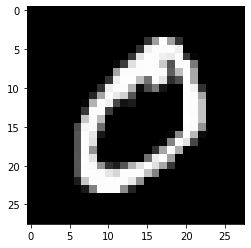

In [52]:
#Check that data still works
print(X_train.shape)
test = 1
sample_img = np.squeeze(X_train[test,:])
print(Y_train[test])
plt.imshow(sample_img, cmap='gray')

In [ ]:
#Run training
params = initialize_model_parameters()
batch_size = 1000
lr = 0.1
beta = 0.9
#Lower epochs for train time if needed. Results are around 90% accurate at 25 epochs
epochs = 50
params, hist = train_cnn_model(X_train, Y_train, X_val, Y_val, params, batch_size, lr, beta, epochs)

Epoch 0: Training Loss = 2.24558, Validation Loss = 2.00317
Epoch 1: Training Loss = 1.79316, Validation Loss = 1.55150
Epoch 2: Training Loss = 1.26715, Validation Loss = 1.11682
Epoch 3: Training Loss = 0.86862, Validation Loss = 0.82318
Epoch 4: Training Loss = 0.63493, Validation Loss = 0.69629
Epoch 5: Training Loss = 0.52614, Validation Loss = 0.58330


In [ ]:
#Plot the training curve
#Separate out the losses from training and the epochs
valLosses = [x[1] for x in hist]
trainLosses = [x[0] for x in hist]
epochs = np.arange(epochs)

#Plot them 
plt.title('Losses vs epoch')
plt.plot(epochs, valLosses, label='Validation loss')
plt.plot(epochs, trainLosses, label='Train loss')
plt.xlabel('Epochs')
plt.ylabel('Losses(Cross Entropy with Regularization)')
plt.legend()


In [ ]:
#Run the predict function 
Y_pred, P = predict(params, X_val)
#Extract the actual values
Y_act = np.argmax(Y_val, axis = 1)

#Make a confusion matrix and a tally for correct predictions
confMat = np.zeros((10,10))
correct = 0

#Iterate through predictions, increment confusion matrix and correct tally
for x in range(len(Y_pred)):
    confMat[Y_pred[x]][Y_act[x]] +=1
    if Y_pred[x] == Y_act[x]:
        correct +=1
    
print("Confusion matrix for validation set:")
print(confMat.astype(int))
print("Accuracy on Valid set:")
print(str(correct*100/len(Y_pred)) + '%')

In [ ]:
#intentionally blank
